Dataset shape: (240, 6)
First few rows of the dataset:
    Temperature         L       R    A_M Spectral_Class  Type
0         3068  0.002400  0.1700  16.12              M     0
1         3042  0.000500  0.1542  16.60              M     0
2         2600  0.000300  0.1020  18.70              M     0
3         2800  0.000200  0.1600  16.65              M     0
4         1939  0.000138  0.1030  20.06              M     0
Accuracy: 0.7708333333333334
Precision: 0.7170138888888888
Recall: 0.7708333333333334
F1 Score: 0.7299019607843138
G-measure: 0.7429502139245429


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


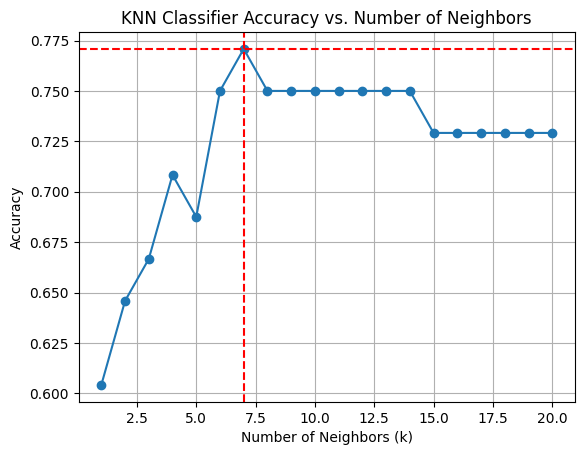

In [18]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('Stars.csv')

# Print dataset information
print("Dataset shape:", data.shape)
print("First few rows of the dataset:\n", data.head())

# Prepare features and target variable
X = data.drop(columns=['Temperature', 'L', 'Spectral_Class'])
y = data['Spectral_Class']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate G-measure
g_measure = 2 * ((precision * recall) / (precision + recall))
print("G-measure:", g_measure)

# Plotting
k_values = range(1, 21)  # Testing k values from 1 to 20
accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.axvline(x=7, color='r', linestyle='--')
plt.axhline(y=accuracy_scores[6], color='r', linestyle='--')
plt.show()
